<a href="https://colab.research.google.com/github/HarmonyKM/sales-predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

**PROJECT 1**
- **Harmony Gasologa**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = '/content/drive/MyDrive/sales_predictions.csv'

In [35]:
df =pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **1. How many rows and columns?**

In [36]:
#1. To find how many rows and columns, & 2.What are the datatypes 
df.info()

#Output tells us we have 8523 rows and 12 columns

#The output also tells us that there are 4 columns with the dtype float64, 1 column with the dtype int64 and 7 columns with the dtype object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### **2. What are the datatypes of each Variable**

*from the output above we have:*

- 4 columns with the datatype float64
- 1 column with the datatype int64
- 7 columns with the datatype object

### **3. Are there duplicates? if so, drop any duplicates**

In [37]:
#Check for duplicates
df.duplicated().sum()

0

### **4. Identify missing values**

In [38]:
#Check for missing values
df.isna().sum()

#Output revealed Item Weight & Outlet Size have missing Values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###**5. Decide on how to address the missing values, and do it &** 
*6. Confirm that there are no missing values after addressing them*

In [39]:
#I will replace the the missing values with the average of the Item_Weights column
weight_mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna('weight_mean', inplace=True)

#Verify change for Item_Weight column was succesful and there are no missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [40]:
#These missing values may be material and since I am not an expert I will use my judgment to replace missing values with the word 'Missing' in the Outlet_Size column.

#To replace missing values with the word 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)

#Verifying change for Outlet_Size column was successful and there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [41]:
df['Item_Weight'].describe()
#We have an error in the column

count            8523
unique            416
top       weight_mean
freq             1463
Name: Item_Weight, dtype: object

### **6. Confirm that there are no missing values after addressing them**

In [42]:
# Replace the incorrect value in Item Weight and try again to change the type
df['Item_Weight'] = df['Item_Weight'].replace('weight_mean', 12.857645184135976)
df['Item_Weight'] = df['Item_Weight'].astype(float)
df.info()

#Error has been fixed, with the Item Weight now returnins as a float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [43]:
#The Outlet_Size measures the size of the store in terms of area covered and this is vital data should they expand. I will not drop but i will fill with "Missing"
df['Outlet_Size'].fillna('Missing', inplace=True)

#Verify change for Outlet_Size column was succesful and there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### **7. Find and fix any inconsistencies**

In [44]:
df.head(40)

#Output reveals the data in the Item_Fat_Content is inconsistent

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


In [45]:
#Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [46]:
#Fixing inconsistent categories of data LF to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [47]:
#Fixing inconsistent categories of data low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [48]:
#Fixing inconsistent categories of data reg to Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### **8. For any numerical columns, obtain the summary statistics of each**

In [49]:
#To show summary statistics for each column, limiting to 2 decimal places
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# **Part 3**

- **Histogram, Boxplot & Heatmap**

## **Histograms**

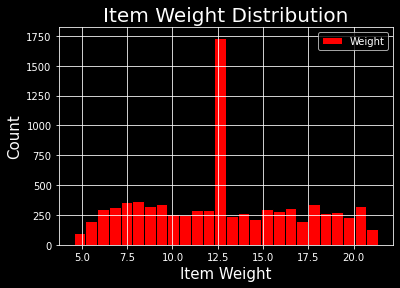

In [50]:
#To plot a Histogram of the Item Weight

df['Item_Weight'].hist(bins = 'auto', color = 'red', edgecolor = 'black', label = 'Weight');
plt.title('Item Weight Distribution', fontsize = 20)
plt.xlabel('Item Weight', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.legend();

**The histogram tells us that the Items that have a weight of 12.5 are the highest percentage of the total count**

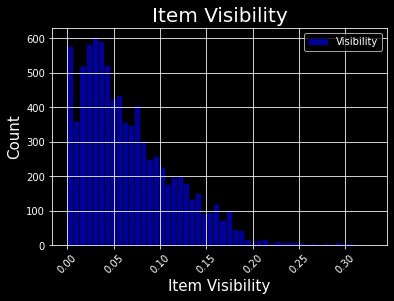

In [51]:
plt.style.use('dark_background')
df['Item_Visibility'].hist(color = 'blue',
                     bins = 'auto',
                     edgecolor = 'black',
                     label = 'Visibility',
                     alpha = 0.6);                           
plt.title('Item Visibility', fontsize = 20);
plt.xlabel('Item Visibility', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(rotation = 45);
plt.legend();

## **Boxplot**

**To plot 2 different multivariate graphs showing the relationship between some of the columns(Outlet Type, Outlet Sales & MRP)**

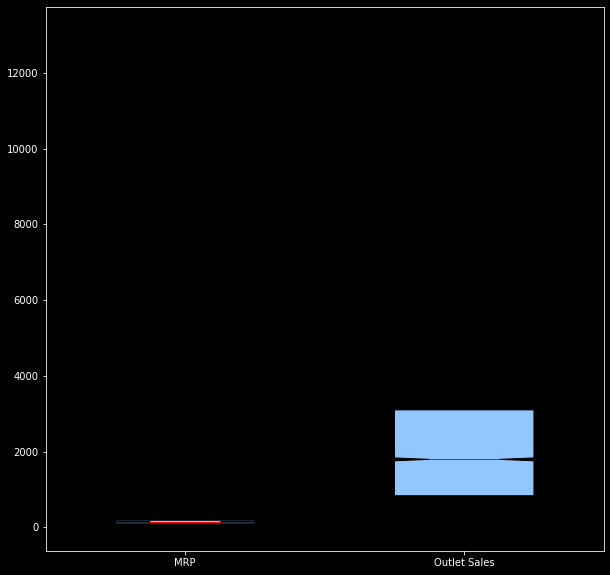

In [52]:
from IPython.core.pylabtools import figsize
mrp= df['Item_MRP']
sales = df['Item_Outlet_Sales']
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,10) )
boxplots = axes.boxplot([mrp, sales], notch= True,labels = ['MRP','Outlet Sales'],
             widths = .5,
             patch_artist = True,
             medianprops = dict(linestyle = '-',linewidth = 1, color = 'red'),
             boxprops = dict(linestyle = '--', linewidth = 1, color = 'black'));

**This boxplot shows that the different outlet types buy products at a very low cost and sell for High margins**

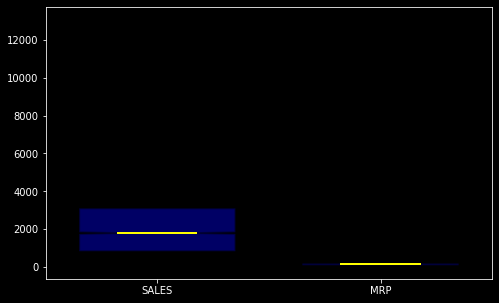

In [53]:
# To plot a boxplot graph of Item MRP and Item Outlet Sales
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
MRP = df['Item_MRP']
SALES = df['Item_Outlet_Sales']
boxplots = axes.boxplot([SALES, MRP],
                        notch = True,
                        labels = ['SALES', 'MRP'],
                        widths = .7,
                        patch_artist = True,
                        medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle= '--', linewidth=2, color='black', facecolor = 'blue', alpha = .4));

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

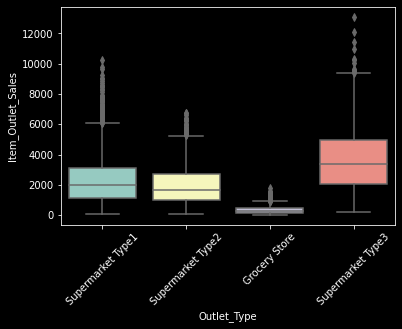

In [54]:
#To plot a boxplot graph of Outlet Type and Item Outlet Sales
import seaborn as sns
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 45)

**The boxplot graph of Outlet Type and Item Outlet Sales shows that each of the Supermarket Outlet Types have greater sales than the Grocery Store.**

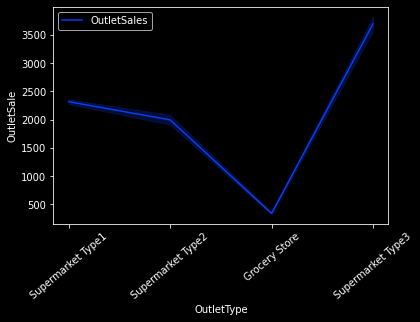

In [55]:
from traitlets.traitlets import Type
plt.style.use('seaborn-bright')
sns.lineplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,label=f'OutletSales');
plt.xlabel('OutletType');
plt.ylabel('OutletSale');
plt.xticks(rotation=40);
plt.legend();

## **Heatmaps**

- *Correaltion between features*

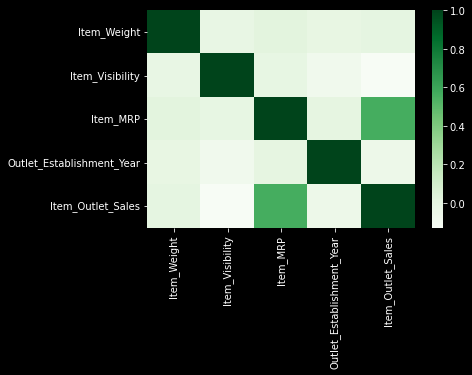

In [56]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens');

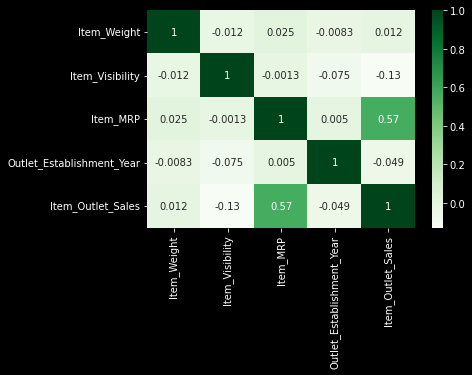

In [57]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

### **This heat map tells us that there is a moderate correlation between Item Outlet Sales and Item MRP**

# **Part 4**

### **To create two more visualizations to show the distribution of Outlet Sales per Outlet Type**

In [58]:
# Creating a variable to summarize the visualization I am creating
Sales_per_outlet_type = df.groupby(['Outlet_Type'])['Item_Outlet_Sales']

In [59]:
Sales_per_outlet_type.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5577.0,2316.181148,1515.965558,73.2380,1151.16820,1990.7420,3135.91800,10256.6490
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648


In [60]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### **The First visualization will be a line plot using Matplotlib**

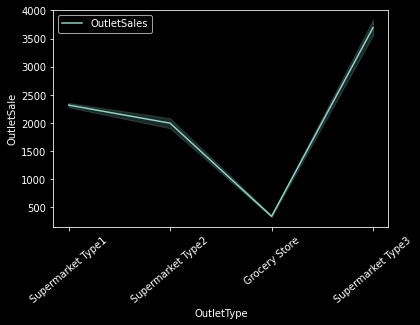

In [61]:
from traitlets.traitlets import Type
plt.style.use('dark_background')
sns.lineplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,label=f'OutletSales')
plt.xlabel('OutletType')
plt.ylabel('OutletSale')
plt.xticks(rotation=40)
plt.legend()

The visualization above shows that the Grocery Store has the least amount of sales and the Supermarket type 3 has the most Sales.

### **The second visualization will be a bar graph using Matplotlib**

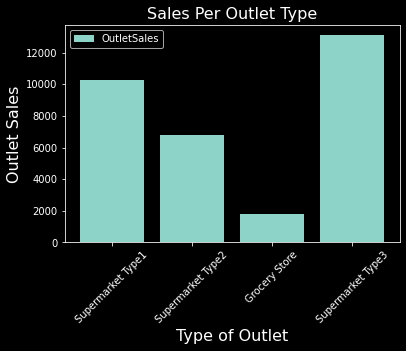

In [62]:
plt.bar('Outlet_Type', 'Item_Outlet_Sales',data=df, label='OutletSales')
plt.style.use('seaborn-pastel')
plt.xlabel('Type of Outlet', fontsize = 16)
plt.ylabel('Outlet Sales', fontsize = 16)
plt.title('Sales Per Outlet Type', fontsize = 16)
plt.xticks(rotation=45)
plt.legend()

This visualization above also shows that the Grocery Store has the least amount of sales and the Supermarket type 3 has the most Sales. In my opinion, this graph is easier to read and understand. Tried out the pastel chart style to see how it is.

# **Part 5** Machine Learning

## **Load Libraries and inpsect data**

### **Import Libraries**

In [63]:
## Preprocessing

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}




### **2. Load the Data**

In [64]:
path = '/content/drive/MyDrive/sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [65]:
# Make a copy of the original df to avoid any manipulations
df_pp = df.copy()

### **3. Explore the Data**

In [66]:
# Look at the info from the data
print(df_pp.info(), '\n')
print(df_pp.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

Item_Identifier                 0
Item

### **4. Fix Inconsistencies in Categorical data**

In [67]:
df_pp['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [68]:
df_pp['Item_Fat_Content'].replace(['LF'], ['Low Fat'], inplace=True)
df_pp['Item_Fat_Content'].replace(['low fat'], ['Low Fat'], inplace=True)
df_pp['Item_Fat_Content'].replace(['reg'], ['Regular'], inplace=True)
df_pp['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## **Check for Duplicated, Missing, or Erroneous Data**

In [69]:
# Display the sum of missing values
df_pp.isna().sum().sum()

3873

In [70]:
# Display the sum of missing values
df_pp.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## **5. Drop Duplicates**

In [71]:
# Check to see if there are any duplicated rows
df_pp.duplicated().sum()

0

In [72]:
# Display descriptive statistics for all columns
df_pp.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## **6. Split the Data (Validation Split)**

- Identify features (X) and target (y)

In [73]:
# split X and y, you are Item Outlet Sales
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

## **Perform a train test split**

In [74]:
# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25 , random_state=42)

## **Pre-processing**

 - Impute missing values 
 - Use the 'mean' strategy for numeric columns 
 - Use the 'most_frequent' strategy for categorical columns

## **Instantiate Column Selectors**

In [75]:
#Instantiate columns selectors
num_selector = make_column_selector(dtype_include= 'number')
cat_selector = make_column_selector(dtype_include='object')

## **Instantiate Transformers**

In [76]:
#Instatiate Transformers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

#Scaler
scaler = StandardScaler()

#OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

- One-hot encode nominal features
- Scale the numeric columns

## **Instantiate Pipelines**

In [77]:
#Instatiate Pipelines

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [78]:
#Categorical Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## **Instantiate ColumnTransformer**

In [79]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff382eb9790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff382eb94c0>)])

## **Fit Preprocessor**

- All preprocessing steps should be contained within a single preprocessing object
- We fit the ColumnTransformer, which we called 'preprocessor' on the training data. **(Never on testing data!)**

In [80]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff382eb9790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff382eb94c0>)])

## **Transform Data**

In [81]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)